In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import datetime
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import pickle


C:\Users\oripo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# stop running here!

### Numerical variables:
1. Age
2. prcp
3. temp
4. PatientId
5. From_Schedualing_to_Appoitment

### Categorical nominal variables: 

1. Neighbourhood_codes
2. Gender_
3. Scholarship
2. Hipertension
5. Diabetes
3. Alcoholism
4. Handcap
5. SMS_received

### Categorical ordinal variables: 

1. Appointment_WeekDay
2. AppointmentDay
4. ScheduledDay_date
5. AppointmentID

In [ ]:
#df_wether_all_day.head()

In [ ]:
#len(df['Neighbourhood_codes'].value_counts())

In [9]:
len(df["PatientId"].unique())

47332

In [10]:
len(df["AppointmentID"])

86054

In [11]:
86054/47332

1.8180934674216176

In [12]:
df["PatientId"].value_counts()

8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
8.713750e+14    62
7.579750e+13    62
6.264200e+12    62
2.584240e+11    62
6.684490e+13    57
8.722790e+11    55
8.923970e+13    54
8.435224e+09    51
8.534400e+14    50
6.543360e+13    46
1.448000e+13    46
9.452750e+12    42
8.189450e+13    42
1.882320e+14    40
9.496200e+12    38
2.271580e+12    38
1.336490e+13    37
1.484140e+12    35
9.861630e+14    34
8.883500e+13    34
7.124590e+14    33
6.128880e+12    30
4.167560e+14    30
8.121400e+13    29
8.634160e+12    24
3.699500e+13    23
                ..
3.315460e+14     1
5.353820e+13     1
8.948440e+13     1
7.794620e+13     1
4.766890e+14     1
6.673320e+13     1
9.489930e+14     1
3.799390e+14     1
4.526390e+11     1
6.142740e+12     1
4.479560e+13     1
1.613840e+14     1
8.948840e+13     1
2.831890e+14     1
4.171120e+12     1
3.814750e+13     1
7.242370e+12     1
2.757380e+14     1
3.839330e+11     1
1.448490e+13     1
5.354220e+13     1
8.522790e+14

In [13]:
#df['AppointmentID'].value_counts().head()

In [14]:
#df['SMS_received'].value_counts().head()
# we can't know if there was more then 1 SMS sent. 

In [ ]:
#df.describe()

In [47]:
#df.info()

### Analizing the data: first conclutions
1. There was 1 row with the age of (-1). It wasn't a no show, so I deleted it (Itamar).
2. The SMS column states if a text was sent or not. It does not state how many sms were sent.

In [49]:
#df.isnull().sum()

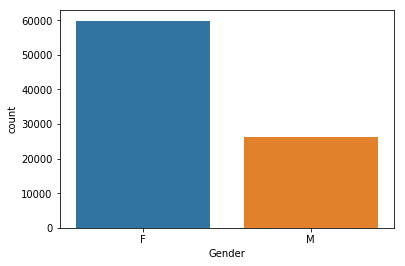

In [15]:
sns.countplot(x='Gender', data=df)
# women go mnore to the doctor
# no differance between men and women in "no-show"s

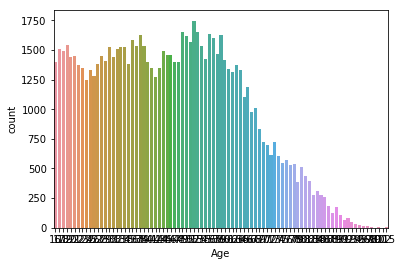

In [16]:
sns.countplot(x='Age', data=df)
# not normal distribution? what to do?

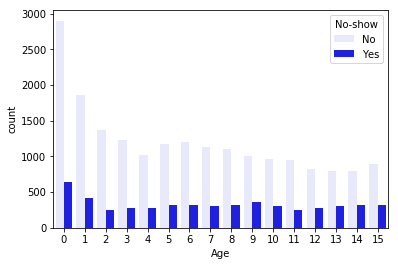

In [17]:
sns.countplot(x='Age', data=dfk,  color='blue',hue = 'No-show')
# not normal distribution? what to do?

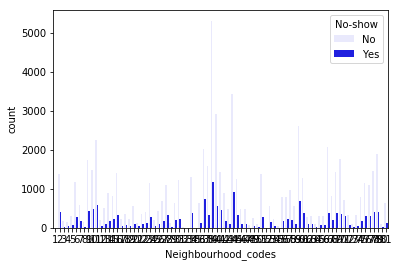

In [18]:
sns.countplot(x='Neighbourhood_codes', data=df, color='blue',hue = 'No-show')

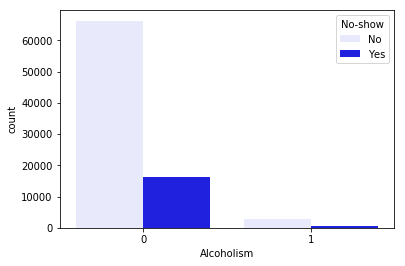

In [19]:
sns.countplot(x='Alcoholism', data=df, color='blue',hue = 'No-show')

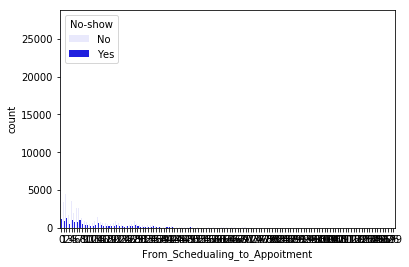

In [20]:
sns.countplot(x='From_Schedualing_to_Appoitment', data=df, color='blue',hue = 'No-show')

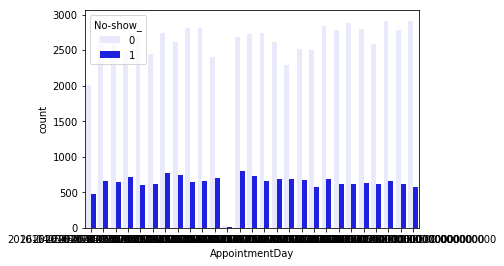

In [21]:
sns.countplot(x='AppointmentDay', data=df, color='blue',hue = 'No-show_')

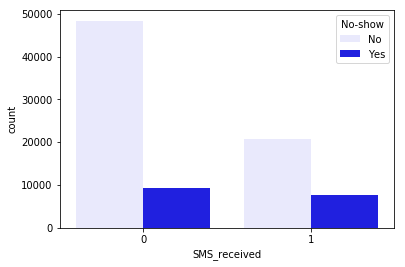

In [22]:
sns.countplot(x='SMS_received', data=df, color='blue',hue = 'No-show')
# SMS did not help decrise the number of no-shows in the problematic patients.

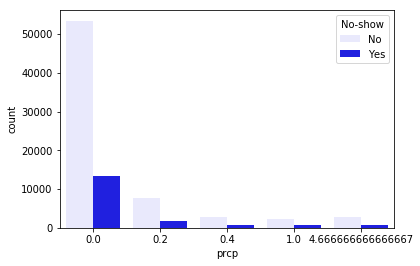

In [23]:
sns.countplot(x='prcp', data=df, color='blue',hue = 'No-show')
# SMS did not help decrise the number of no-shows in the problematic patients.

In [24]:
# sns.countplot(y='Scholarship', data=df, color='blue',hue = 'No-show')

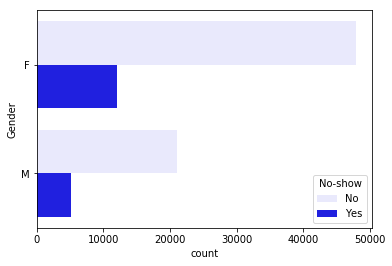

In [60]:
sns.countplot(y='Gender', data=df, color='blue',hue = 'No-show')

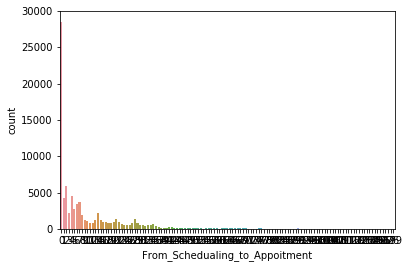

In [25]:
sns.countplot(x='From_Schedualing_to_Appoitment', data=df)
#how to make normal?

In [26]:
# df.sort_values('AppointmentDay')

In [45]:

df.head()

,PatientId,AppointmentID,Age,Gender,Gender_,Neighbourhood,Neighbourhood_codes,AppointmentDay,Appointment_WeekDay,From_Schedualing_to_Appoitment,...,temp,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_date,No-show,No-show_
0,7.184430e+13,5638545,0,F,0,CONQUISTA,13,2016-04-29,6,0,...,22.65,0,0,0,0,0,0,2016-04-29,No,0
1,2.366230e+14,5628286,0,M,1,SÃO BENEDITO,75,2016-04-29,6,2,...,22.65,0,0,0,0,0,0,2016-04-27,No,0
2,1.885170e+14,5616082,0,M,1,ILHA DAS CAIEIRAS,30,2016-04-29,6,4,...,22.65,0,0,0,0,0,1,2016-04-25,No,0
3,2.718820e+14,5628321,0,M,1,CONQUISTA,13,2016-04-29,6,2,...,22.65,0,0,0,0,0,0,2016-04-27,No,0
4,8.647130e+13,5639264,0,F,0,NOVA PALESTINA,51,2016-04-29,6,0,...,22.65,0,0,0,0,0,0,2016-04-29,No,0


In [28]:
# Identify missing data
df.isnull().sum()
# no missing data :)

PatientId                         0
AppointmentID                     0
Age                               0
Gender                            0
Gender_                           0
Neighbourhood                     0
Neighbourhood_codes               0
AppointmentDay                    0
Appointment_WeekDay               0
From_Schedualing_to_Appoitment    0
prcp                              0
temp                              0
Scholarship                       0
Hipertension                      0
Diabetes                          0
Alcoholism                        0
Handcap                           0
SMS_received                      0
ScheduledDay_date                 0
No-show                           0
No-show_                          0
dtype: int64

### making a pie chart

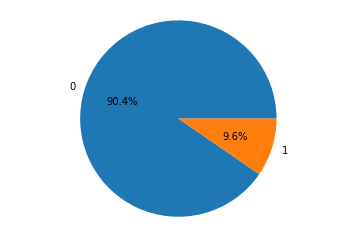

In [64]:
fig1, ax1 = plt.subplots()

slices = df["Scholarship"].value_counts()
labels = slices.index
ax1.pie(slices, autopct='%1.1f%%', labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

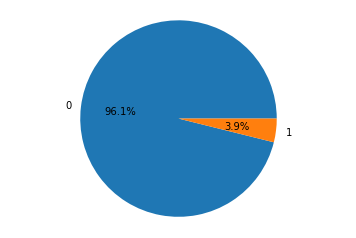

In [65]:
fig1, ax1 = plt.subplots()

slices = df["Alcoholism"].value_counts()
labels = slices.index
ax1.pie(slices, autopct='%1.1f%%', labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##### Encode ordinal feature
We can define a dictionary that maps each ordinal value to a numerical value, and then use the function "map" as shown below, or use the function "replace" as shown in: http://pbpython.com/categorical-encoding.html .

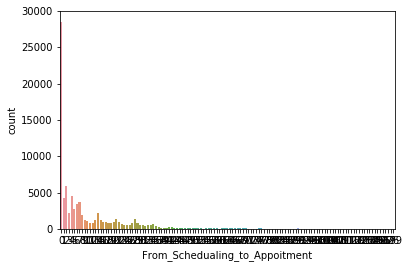

In [66]:
sns.countplot(x='From_Schedualing_to_Appoitment', data=df)

##### #### 3.1 Histograms to view features

In [ ]:
df.columns

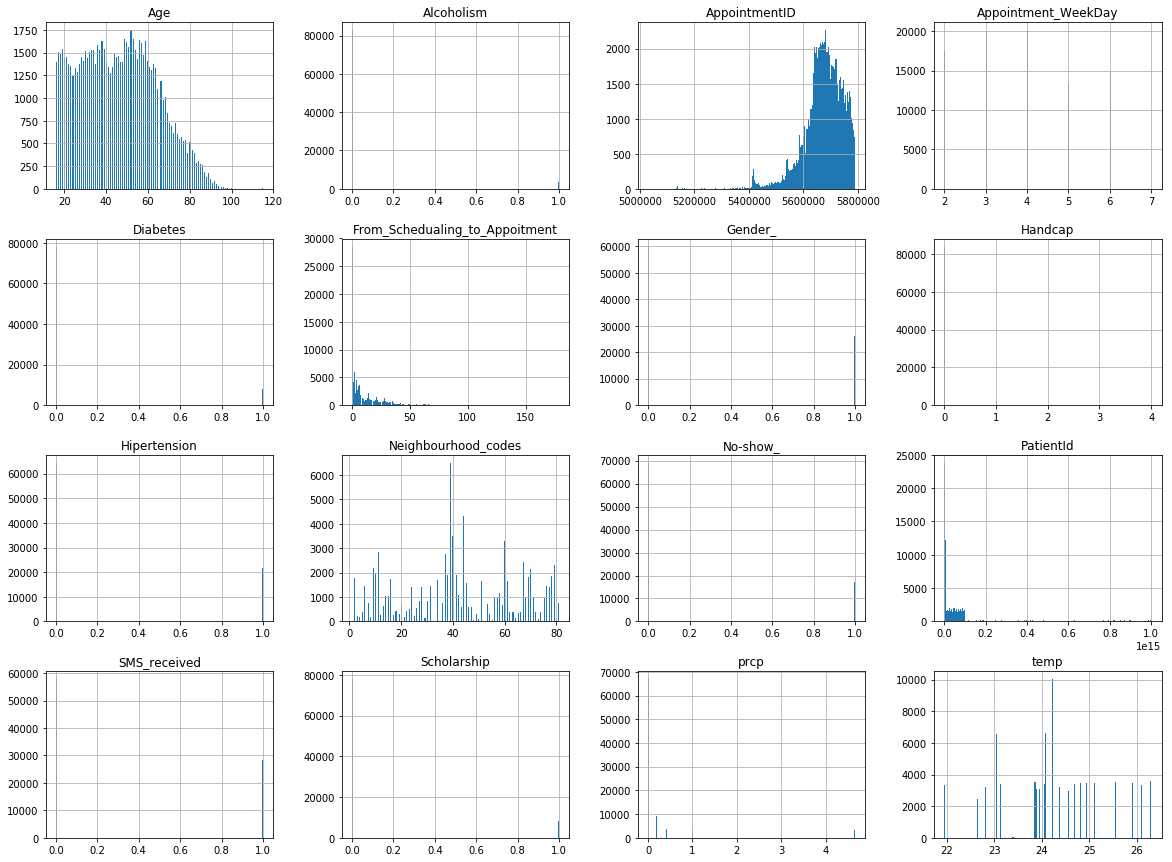

In [67]:
df.hist(bins = 200, figsize = (20,15), column=['PatientId', 'AppointmentID', 'Age', 'Gender', 'Gender_',
       'Neighbourhood', 'Neighbourhood_codes', 'AppointmentDay',
       'Appointment_WeekDay', 'From_Schedualing_to_Appoitment', 'prcp', 'temp',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'ScheduledDay_date', 'No-show', 'No-show_']) #Check the hist parameters by clicking on the Tab completion. 
plt.show()

In [ ]:
sns.distplot(df["Age"], fit=norm)

In [ ]:
sns.distplot(df["prcp"], fit=norm)

In [ ]:
sns.distplot(df["Appointment_WeekDay"])


In [ ]:
#לא יודעים מה לעשות עם זה
#New_age = np.clip(df['Age'], 1, 95)
#plt.hist(df['Age'], bins=50)
#plt.hist(New_age, bins=50, color='red', alpha = 0.5)
#plt.show()

In [68]:
sqrt_age = np.sqrt(df["Age"])

C:\Users\lapid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


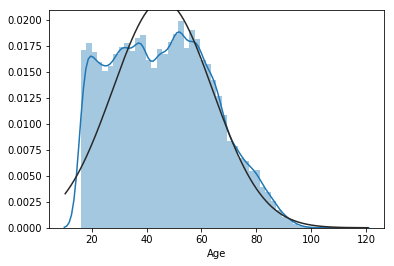

In [69]:
sns.distplot(df["Age"], fit=norm)

In [70]:
sns.distplot(log_age, fit=norm, bins=15)

NameError: name 'log_age' is not defined

# Start of train/test

In [71]:
df_N = df.drop(['PatientId', 'AppointmentID', 'Age', 'Gender', 'Gender_',
    'AppointmentDay',
       'Appointment_WeekDay', 'From_Schedualing_to_Appoitment', 'prcp', 'temp',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'ScheduledDay_date', 'No-show', 'No-show_'], axis=1)
df = df.drop(['Gender','No-show','Neighbourhood', 'AppointmentDay', 'ScheduledDay_date'], axis=1)

In [72]:
train_df, test_df= train_test_split(df, test_size = 0.2, random_state=7)
# train_test_split is from sklearn. It requiers that the data will be a numpy array, that is numbers only.
# If your prediction class in y is very small, then add a parameter startify = y

In [73]:
y = train_df["No-show_"]
X = train_df

In [47]:
df

,PatientId,AppointmentID,Age,Gender,Gender_,Neighbourhood,Neighbourhood_codes,AppointmentDay,Appointment_WeekDay,From_Schedualing_to_Appoitment,...,temp,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_date,No-show,No-show_
0,7.184430e+13,5638545,0,F,0,CONQUISTA,13,2016-04-29,6,0,...,22.650000,0,0,0,0,0,0,2016-04-29,No,0
1,2.366230e+14,5628286,0,M,1,SÃO BENEDITO,75,2016-04-29,6,2,...,22.650000,0,0,0,0,0,0,2016-04-27,No,0
2,1.885170e+14,5616082,0,M,1,ILHA DAS CAIEIRAS,30,2016-04-29,6,4,...,22.650000,0,0,0,0,0,1,2016-04-25,No,0
3,2.718820e+14,5628321,0,M,1,CONQUISTA,13,2016-04-29,6,2,...,22.650000,0,0,0,0,0,0,2016-04-27,No,0
4,8.647130e+13,5639264,0,F,0,NOVA PALESTINA,51,2016-04-29,6,0,...,22.650000,0,0,0,0,0,0,2016-04-29,No,0
5,4.314930e+14,5640380,0,M,1,MONTE BELO,47,2016-04-29,6,0,...,22.650000,0,0,0,0,0,0,2016-04-29,No,0
6,6.822850e+13,5642813,0,M,1,BONFIM,9,2016-04-29,6,0,...,22.650000,0,0,0,0,0,0,2016-04-29,No,0
7,3.326990e+12,5632495,0,F,0,SANTO ANTÔNIO,70,2016-04-29,6,1,...,22.650000,0,0,0,0,0,0,2016-04-28,Yes,1
8,8.468590e+14,5560742,0,M,1,PRAIA DO SUÁ,57,2016-04-29,6,21,...,22.650000,0,0,0,0,0,1,2016-04-08,Yes,1
9,5.392419e+10,5641476,0,M,1,ITARARÉ,37,2016-04-29,6,0,...,22.650000,0,0,0,0,0,0,2016-04-29,No,0


In [74]:
train_df_numeric = train_df.iloc[:, 0:20]
# iloc = integer-location based indexing for selection by position
corr_df=train_df_numeric.corr()
corr_df

,PatientId,AppointmentID,Age,Gender_,Neighbourhood_codes,Appointment_WeekDay,From_Schedualing_to_Appoitment,prcp,temp,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show_
PatientId,1.000000,0.000807,-0.003689,0.011260,0.004683,-0.000938,0.003031,0.001356,0.005275,0.000969,-0.006820,0.001199,0.011994,-0.003559,-0.006519,0.000200
AppointmentID,0.000807,1.000000,-0.022907,0.025010,0.002786,-0.051003,-0.779173,-0.040578,0.043289,0.021905,0.018419,0.027832,0.038204,0.013368,-0.246798,-0.150026
Age,-0.003689,-0.022907,1.000000,0.036990,0.003358,-0.003383,0.037782,-0.009317,-0.004084,-0.143258,0.472810,0.272148,0.042202,0.064992,-0.017255,-0.083190
Gender_,0.011260,0.025010,0.036990,1.000000,-0.017714,0.008642,-0.034720,0.006540,0.001129,-0.146932,-0.009163,-0.003874,0.141360,0.034517,-0.054394,-0.008018
Neighbourhood_codes,0.004683,0.002786,0.003358,-0.017714,1.000000,-0.004515,-0.002411,-0.002902,-0.003853,0.004630,0.009161,0.016037,0.001986,0.012324,0.022656,-0.010188
Appointment_WeekDay,-0.000938,-0.051003,-0.003383,0.008642,-0.004515,1.000000,-0.014105,0.239549,-0.174185,-0.007664,0.002879,0.006735,0.002918,0.001494,-0.101127,-0.004048
From_Schedualing_to_Appoitment,0.003031,-0.779173,0.037782,-0.034720,-0.002411,-0.014105,1.000000,-0.012850,-0.009667,-0.028396,-0.024050,-0.033191,-0.042849,-0.019629,0.385494,0.170900
prcp,0.001356,-0.040578,-0.009317,0.006540,-0.002902,0.239549,-0.012850,1.000000,0.166564,-0.003687,-0.003097,-0.004557,0.001806,-0.000422,-0.006581,-0.004494
temp,0.005275,0.043289,-0.004084,0.001129,-0.003853,-0.174185,-0.009667,0.166564,1.000000,-0.005984,-0.009694,-0.002680,-0.002740,-0.000909,-0.117233,0.012896
Scholarship,0.000969,0.021905,-0.143258,-0.146932,0.004630,-0.007664,-0.028396,-0.003687,-0.005984,1.000000,-0.016437,-0.023813,0.044333,-0.009604,0.000581,0.031123


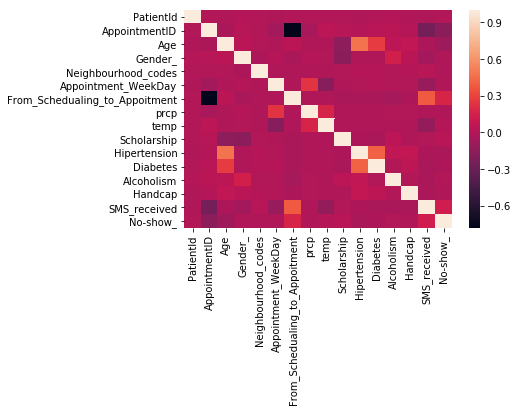

In [75]:
sns.heatmap(corr_df)
# corr of 47% > Age + Hypertention (blood pressure)
# corr of 27% > Age + Diabetes
# corr of 41% > Diabetes + Hypertention (blood pressure)
# corr of 38% > SMS + From_Schedualing_to_Appoitment

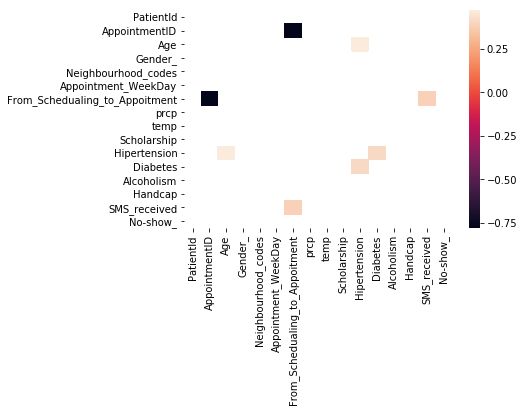

In [83]:
sns.heatmap(corr_df[(corr_df<1) & ((corr_df >= 0.3) | (corr_df <= -0.3)) ] )

In [ ]:
corr_matrix = train_df.corr()
corr_matrix["No-show_"].sort_values()

In [ ]:
plt.scatter(data = train_df, x="last_evaluation", y="satisfaction_level", alpha=0.1)

In [ ]:
sns.pairplot(train_df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}})

In [ ]:
pd.crosstab(train_df['No-show_'], train_df['SMS_received'], margins=True)

In [ ]:
attributes = ['Age', 'Diabetes','SMS_received']

In [ ]:
scatter_matrix(df[attributes], figsize=(12,8))

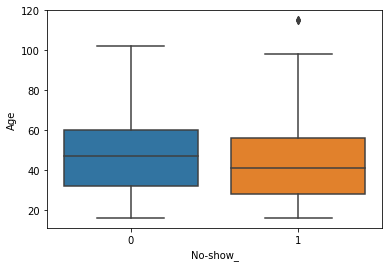

In [77]:
sns.boxplot(x='No-show_', y='Age', data=train_df)
# No-show are of all ages, and the no shows are a bit younger.


In [ ]:
sns.boxplot(x='No-show_', y='temp', data=train_df)

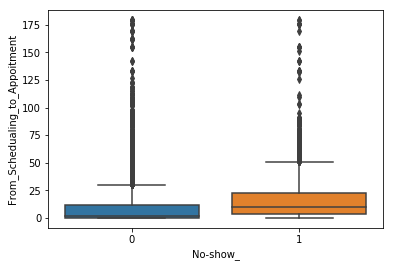

In [78]:
sns.boxplot(x='No-show_', y='From_Schedualing_to_Appoitment', data=train_df)
# more no-shows have bigger gap between the schedualing to the appoitment date than the shows.

In [ ]:
sns.countplot(y='From_Schedualing_to_Appoitment', data=df, color='blue',hue = 'No-show')

In [12]:
mms = MinMaxScaler()

In [13]:
train_df_normalized = mms.fit_transform(train_df) # fit is getting min and max, and transform changes the data by min-max
test_df_normalized = mms.transform(test_df) #for testing use transform only. Min and max are taken from the train

In [16]:
stdsc = StandardScaler()
train_df_std = stdsc.fit_transform(train_df) # fit is getting mean and std, and transform changes the data by standartization
test_df_std = stdsc.transform(test_df) #for testing use transform only. Mean and std are taken from the train

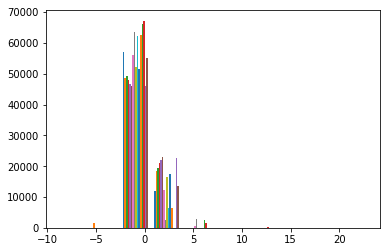

In [17]:
plt.hist(train_df_std)
plt.show()

In [79]:
pickle.dump(train_df, open("train_df.dat", "wb")) # wb = write binary

In [80]:
train_df_read = pickle.load(open("train_df.dat", "rb"))

In [81]:
pickle.dump(test_df, open("test_df.dat", "wb"))
pickle.dump(train_df_std, open("train_df_std.dat", "wb"))
pickle.dump(test_df_std, open("test_df_std.dat", "wb"))

In [46]:
pickle.dump(train_df_normalized, open("train_df_normalized.dat", "wb"))
pickle.dump(test_df_normalized, open("test_df_normalized.dat", "wb"))


NameError: name 'train_df_normalized' is not defined